In [34]:
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [35]:
import kuhn_poker_helpers

# Visualization of Payoff Matrix and Strategy profiles

In [36]:
M = kuhn_poker_helpers.create_M()
profiles_P1, profiles_P2 = kuhn_poker_helpers.create_profiles()

## Payoff Matrix.

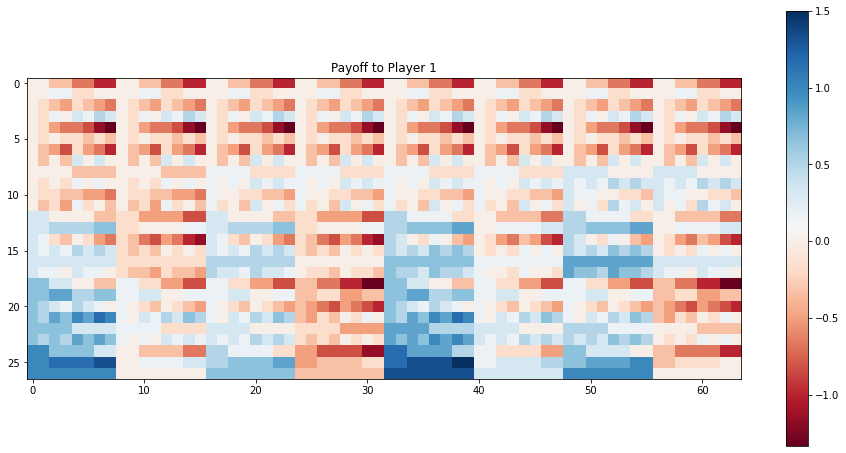

In [37]:
plt.figure(figsize=(16,8))
pos = plt.imshow(M, cmap='RdBu', interpolation='none')
plt.title('Payoff to Player 1')
plt.colorbar(pos)

## Strategy Profiles

In [59]:
# strategies of player one
pd.DataFrame(profiles_P1).head(30)

,J,Q,K,J-raised,Q-raised,K-raised
0,check,check,check,fold,fold,fold
1,check,check,check,fold,fold,call
2,check,check,check,fold,call,fold
3,check,check,check,fold,call,call
4,check,check,check,call,fold,fold
5,check,check,check,call,fold,call
6,check,check,check,call,call,fold
7,check,check,check,call,call,call
8,check,check,bet,fold,fold,None
9,check,check,bet,fold,call,None


In [58]:
# strategies of player two
pd.DataFrame(profiles_P2).head(60)

,J-checked,Q-checked,K-checked,J-bet,Q-bet,K-bet
0,check,check,check,fold,fold,fold
1,check,check,bet,fold,fold,fold
2,check,bet,check,fold,fold,fold
3,check,bet,bet,fold,fold,fold
4,bet,check,check,fold,fold,fold
5,bet,check,bet,fold,fold,fold
6,bet,bet,check,fold,fold,fold
7,bet,bet,bet,fold,fold,fold
8,check,check,check,fold,fold,call
9,check,check,bet,fold,fold,call


In strategy `1`, the row player checks any card, and if raised folds except if she has a king.
In strategy `0`, the column player checks if the row player checks and folds if player the row player bets. 

# 2.2.b Computing the Optimal strategy

In [40]:
# construct the Nash strategies of both players and report the expected payoff of the row-player. Interpret your results.

# define the variables
p = cp.Variable((len(profiles_P1)), nonneg=True)
a = cp.Variable((1), nonneg=False)

# define the objective function

obj = cp.Maximize(a)

# define the constraints
constraints = [cp.sum(p) == 1, a <= (p@M), p>=0]

# define the problem
prob = cp.Problem(obj, constraints)

# solve the problem
prob.solve()
print(f'Status: {prob.status}\n')

# Print the optimal value and the optimal strategy of both players
optimal_strategy_string_row = ''
optimal_strategy_string_col = ''

dual_values = constraints[1].dual_value

for i in range(len(profiles_P1)):
    optimal_strategy_string_row += f'p{i} : {np.round(p.value[i], 3)}\t'
    if (i+1)%8 == 0:
        optimal_strategy_string_row += '\n'

for i in range(len(profiles_P2)):
    optimal_strategy_string_col += f'q{i} : {np.round(dual_values[i], 3)}\t'
    if (i+1)%8 == 0:
        optimal_strategy_string_col += '\n'


print(f'The optimal strategy of the *row* player is :\n', optimal_strategy_string_row)
print(f'\nThe expected payoff of the *column* player is:\n', optimal_strategy_string_col)

# print the dual values
print(f'\nThe *row* player has a payoff of {np.round(a.value, 3)[0]}')
print(f'The *column* player has a payoff of {-np.round(constraints[0].dual_value, 3)}')

Status: optimal

The optimal strategy of the *row* player is :
 p0 : 0.0	p1 : 0.184	p2 : 0.0	p3 : 0.183	p4 : 0.0	p5 : 0.0	p6 : 0.0	p7 : 0.0	
p8 : 0.211	p9 : 0.241	p10 : 0.0	p11 : 0.0	p12 : 0.0	p13 : 0.0	p14 : 0.0	p15 : 0.0	
p16 : 0.0	p17 : 0.0	p18 : 0.0	p19 : 0.045	p20 : 0.0	p21 : 0.044	p22 : 0.045	p23 : 0.046	
p24 : 0.0	p25 : 0.0	p26 : 0.0	

The expected payoff of the *column* player is:
 q0 : 0.0	q1 : 0.0	q2 : 0.0	q3 : 0.0	q4 : 0.0	q5 : 0.0	q6 : 0.0	q7 : 0.0	
q8 : 0.0	q9 : 0.466	q10 : 0.0	q11 : 0.0	q12 : 0.0	q13 : 0.2	q14 : 0.0	q15 : 0.0	
q16 : 0.0	q17 : 0.0	q18 : 0.0	q19 : 0.0	q20 : 0.0	q21 : 0.0	q22 : 0.0	q23 : 0.0	
q24 : 0.0	q25 : 0.2	q26 : 0.0	q27 : 0.0	q28 : 0.0	q29 : 0.133	q30 : 0.0	q31 : 0.0	
q32 : 0.0	q33 : 0.0	q34 : 0.0	q35 : 0.0	q36 : 0.0	q37 : 0.0	q38 : 0.0	q39 : 0.0	
q40 : 0.0	q41 : 0.0	q42 : 0.0	q43 : 0.0	q44 : 0.0	q45 : 0.0	q46 : 0.0	q47 : 0.0	
q48 : 0.0	q49 : 0.0	q50 : 0.0	q51 : 0.0	q52 : 0.0	q53 : 0.0	q54 : 0.0	q55 : 0.0	
q56 : 0.0	q57 : 0.0	q58 : 0.0	q59 : 0.0	q60 : 

In [78]:
# print the final trategy for each player
profiles_P1 = pd.DataFrame(profiles_P1)

p_check_row = [0,0,0]
p_fold_row = [0,0,0]
p_bet_row = [0,0,0]
p_call_row = [0,0,0]

# Look for the corresponding strategies in the profiles_P1 and add the probability of each choice
for i in range(len(profiles_P1)):
    p_check_row[0] += (profiles_P1.iloc[i,0] == "check")*p.value[i]
    p_check_row[1] += (profiles_P1.iloc[i,1] == "check")*p.value[i]
    p_check_row[2] += (profiles_P1.iloc[i,2] == "check")*p.value[i]

    p_bet_row[0] += (profiles_P1.iloc[i,0] == "bet")*p.value[i]
    p_bet_row[1] += (profiles_P1.iloc[i,1] == "bet")*p.value[i]
    p_bet_row[2] += (profiles_P1.iloc[i,2] == "bet")*p.value[i]

    p_fold_row[0] += (profiles_P1.iloc[i,3] == "fold")*p.value[i]
    p_fold_row[1] += (profiles_P1.iloc[i,4] == "fold")*p.value[i]
    p_fold_row[2] += (profiles_P1.iloc[i,5] == "fold")*p.value[i]

    p_call_row[0] += (profiles_P1.iloc[i,3] == "call")*p.value[i]
    p_call_row[1] += (profiles_P1.iloc[i,4] == "call")*p.value[i]
    p_call_row[2] += (profiles_P1.iloc[i,5] == "call")*p.value[i]

# make the sum of the probabilities equal to 1 for p_fold_row and p_call_row, in order to compensate for the NONE values
for i in range(3):
    strat_sum = p_fold_row[i] + p_call_row[i]
    p_fold_row[i] = p_fold_row[i]/strat_sum
    p_call_row[i] = p_call_row[i]/strat_sum

print("On the first round, the row player will choose to play with probability :")
print("\tJ\tQ\tK")
print("check\t"+ str(np.round(p_check_row[0],3))+ '\t' + str(np.round(p_check_row[1],3))+ '\t' + str(np.round(p_check_row[2],3)))
print("bet\t"+ str(np.round(p_bet_row[0],3))+ '\t' + str(np.round(p_bet_row[1],3))+ '\t' + str(np.round(p_bet_row[2],3)))

print("\nOn the second round, the row player will choose to play with probability :")
print("\tJ-raised\tQ-raised\tK-raised")
print("call\t"+ str(np.round(p_call_row[0],3))+ '\t\t' + str(np.round(p_call_row[1],3))+ '\t\t' + str(np.round(p_call_row[2],3)))
print("fold\t"+ str(np.round(p_fold_row[0],3))+ '\t\t' + str(np.round(p_fold_row[1],3))+ '\t\t' + str(np.round(p_fold_row[2],3)))

On the first round, the row player will choose to play with probability :
	J	Q	K
check	0.819	1.0	0.457
bet	0.181	0.0	0.543

On the second round, the row player will choose to play with probability :
	J-raised	Q-raised	K-raised
call	0.0		0.514		1.0
fold	1.0		0.486		0.0


In [80]:
profiles_P2 = pd.DataFrame(profiles_P2)

p_check_col = [0,0,0,0,0,0]
p_fold_col = [0,0,0,0,0,0]
p_bet_col = [0,0,0,0,0,0]
p_call_col = [0,0,0,0,0,0]

# Look for the corresponding strategies in the profiles_P2 and add the probability of each choice
for i in range(len(profiles_P2)):
    p_check_col += (profiles_P2.iloc[i] == "check")*dual_values[i]
    p_bet_col += (profiles_P2.iloc[i] == "bet")*dual_values[i]
    p_fold_col += (profiles_P2.iloc[i] == "fold")*dual_values[i]
    p_call_col += (profiles_P2.iloc[i] == "call")*dual_values[i]

print("\nOn the first round, the column player will choose to play with probability :")
print("\tJ-checked\tQ-checked\tK-checked\tJ-bet\tQ-bet\tK-bet")
print("check\t"+ str(np.round(p_check_col[0],3))+ '\t\t' + str(np.round(p_check_col[1],3))+ '\t\t' + str(np.round(p_check_col[2],3))+ '\t\t' + str(np.round(p_check_col[3],3))+ '\t' + str(np.round(p_check_col[4],3))+ '\t' + str(np.round(p_check_col[5],3)))
print("bet\t"+ str(np.round(p_bet_col[0],3))+ '\t\t' + str(np.round(p_bet_col[1],3))+ '\t\t' + str(np.round(p_bet_col[2],3))+ '\t\t' + str(np.round(p_bet_col[3],3))+ '\t' + str(np.round(p_bet_col[4],3))+ '\t' + str(np.round(p_bet_col[5],3)))
print("fold\t"+ str(np.round(p_fold_col[0],3))+ '\t\t' + str(np.round(p_fold_col[1],3))+ '\t\t' + str(np.round(p_fold_col[2],3))+ '\t\t' + str(np.round(p_fold_col[3],3))+ '\t' + str(np.round(p_fold_col[4],3))+ '\t' + str(np.round(p_fold_col[5],3)))
print("call\t"+ str(np.round(p_call_col[0],3))+ '\t\t' + str(np.round(p_call_col[1],3))+ '\t\t' + str(np.round(p_call_col[2],3))+ '\t\t' + str(np.round(p_call_col[3],3))+ '\t' + str(np.round(p_call_col[4],3))+ '\t' + str(np.round(p_call_col[5],3)))



On the first round, the column player will choose to play with probability :
	J-checked	Q-checked	K-checked	J-bet	Q-bet	K-bet
check	0.667		1.0		0.0		0.0	0.0	0.0
bet	0.333		0.0		1.0		0.0	0.0	0.0
fold	0.0		0.0		0.0		1.0	0.667	0.0
call	0.0		0.0		0.0		0.0	0.333	1.0


# 2.2.c Strategy of Jack, given checked and raised

In [19]:
# where J column is "check"
df_p1 = pd.DataFrame(profiles_P1)
df_p2 = pd.DataFrame(profiles_P2)

# where J column is "check"
row_strategy = df_p1[df_p1['J'] == 'check'].index

# where Q-checked or K-checked column is "bet"
col_strategy = df_p2[(df_p2['Q-checked'] == 'bet') | (df_p2['K-checked'] == 'bet')].index

# Reduce the M matrix to the submatrix of the strategies of the row player and the column player
print("shape of M", np.shape(M))
print("shape of row_strategy", np.shape(row_strategy))
print("shape of col_strategy", np.shape(col_strategy))

M_sub = M[row_strategy, :]
M_sub = M_sub[:, col_strategy]

# define the variables
p = cp.Variable((len(row_strategy)), nonneg=True)
a = cp.Variable((1), nonneg=False)

# define the objective function

obj = cp.Maximize(a)

# define the constraints
constraints = [cp.sum(p) == 1, a <= (p@M_sub), p>=0]

# define the problem
prob = cp.Problem(obj, constraints)

# solve the problem
prob.solve()
print(f'Status: {prob.status}\n')

# Print the optimal value and the optimal strategy
optimal_strategy_string = ''
# create a string table of optimal strategies with same spacing
for i in range(len(row_strategy)):
    optimal_strategy_string += f'p{row_strategy[i]} : {np.round(p.value[i], 3)}\t'
    if (i+1)%6 == 0:
        optimal_strategy_string += '\n'


print(f'\nThe optimal strategy is :\n', optimal_strategy_string)

print(f'\nThe expected payoff of the row player is', np.round(prob.value, 3))

shape of M (27, 64)
shape of row_strategy (18,)
shape of col_strategy (48,)
Status: optimal


The optimal strategy is :
 p0 : 0.0	p1 : 0.667	p2 : 0.0	p3 : 0.333	p4 : 0.0	p5 : 0.0	
p6 : 0.0	p7 : 0.0	p8 : 0.0	p9 : 0.0	p10 : 0.0	p11 : 0.0	
p12 : 0.0	p13 : 0.0	p14 : 0.0	p15 : 0.0	p16 : 0.0	p17 : 0.0	


The expected payoff of the row player is -0.056
